In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score

# <center><b1><i>Fish Measurement prediction</i></b1></center>
       

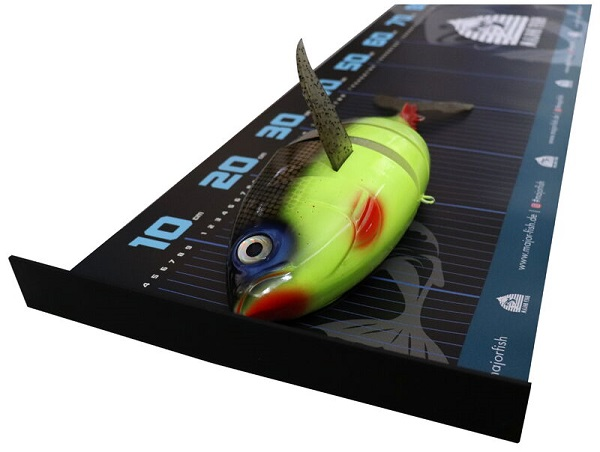

In [2]:
df=pd.read_csv('./Fish.csv') # data file reading

### Basic Check

In [3]:
df   # data showing

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Domain Analysis
#### > Species - 7 types of fish species names (Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish)
#### > Weight of fish
#### > Length of fish here 3 types of length ( Length1,Length2,	Length3)
#### > Height of the fish 
#### > Width of the fish

In [4]:
df.isnull().sum()  # null value checking

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.info()  # datatypes checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.duplicated().sum()  # duplicates checking

0

In [7]:
df.Weight.value_counts()  # weight value counts checking

300.0     6
1000.0    5
500.0     5
120.0     5
700.0     5
         ..
60.0      1
55.0      1
800.0     1
306.0     1
19.9      1
Name: Weight, Length: 101, dtype: int64

In [8]:
df.describe()  # describes abouts dataset 

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Insights of Basic Check
 #### > 7 columns and 159 rows are counted in this dataset
 #### > 2 Types of datatypes object and float
 #### > No Duplicates Values in dataset
 #### >Species is Categorical column and 7 types of Species are in the list
 #### >  6 columns are continues data 

##  <CENTER>Exploratory Data Analysis</CENTER>

### Univariate Analysis 

### Histogram

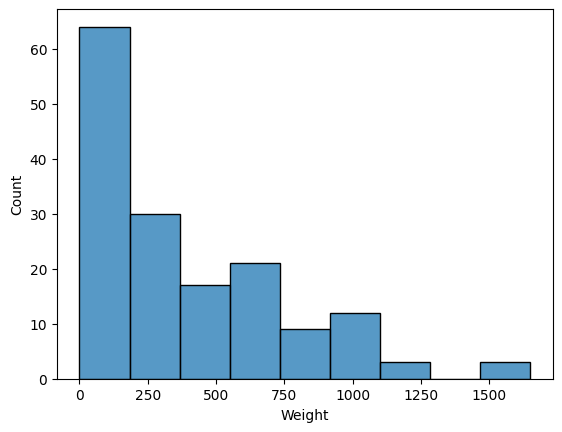

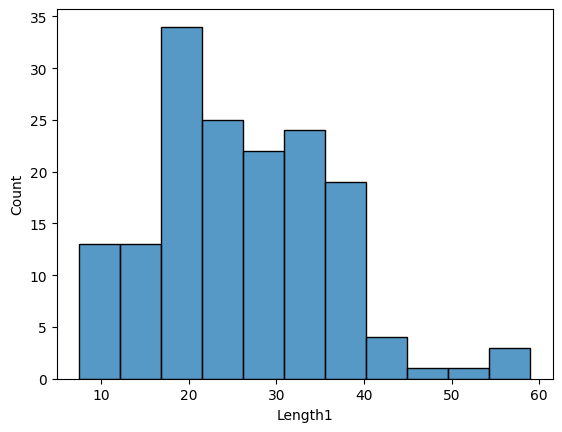

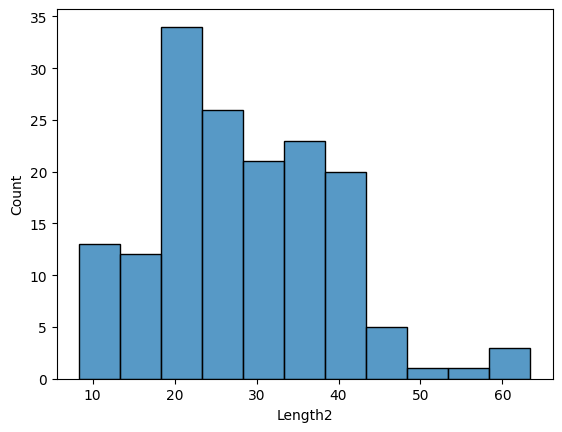

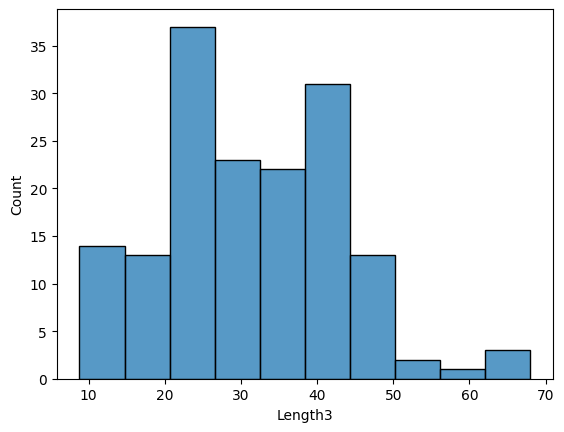

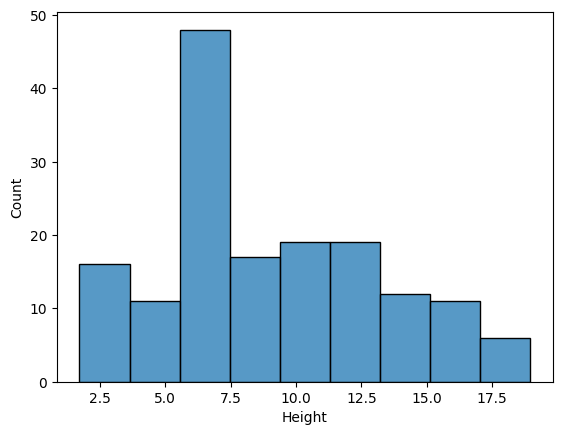

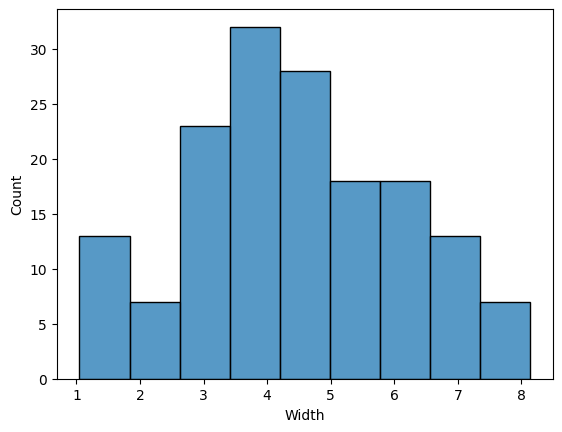

In [9]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show();               

### Kde Plot

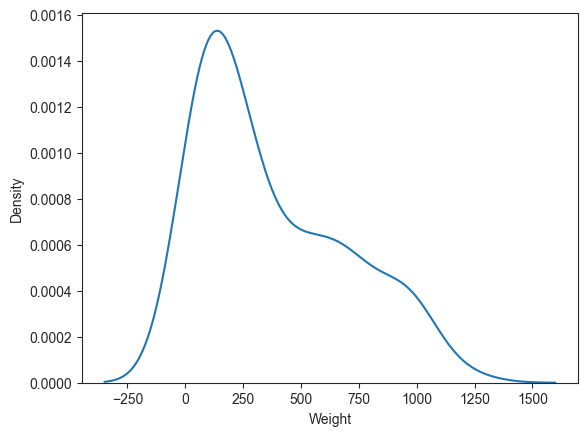

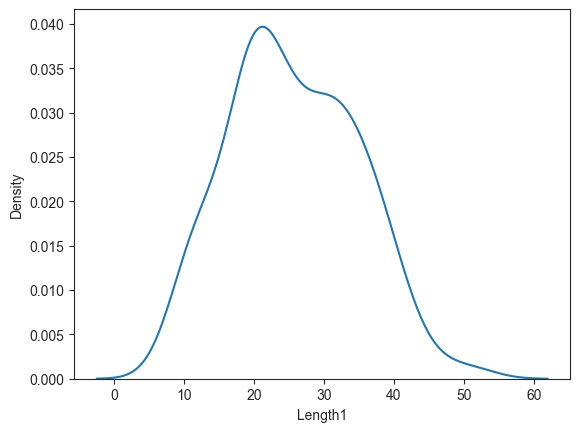

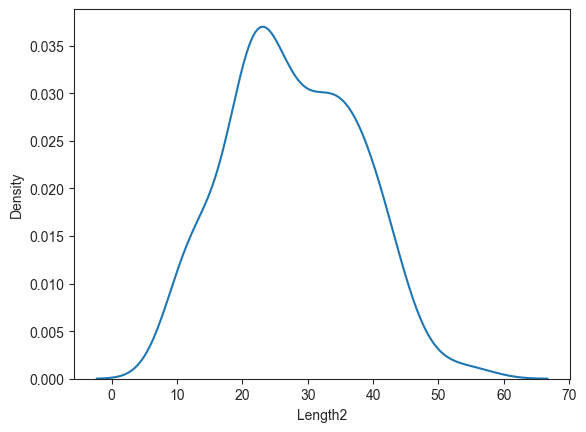

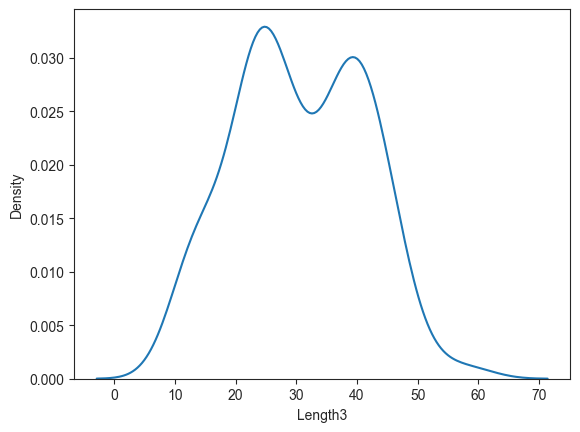

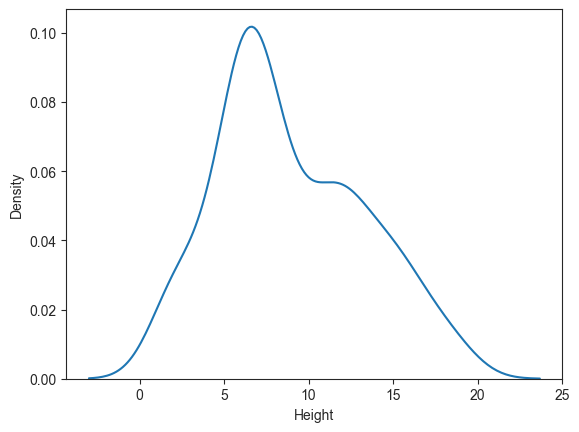

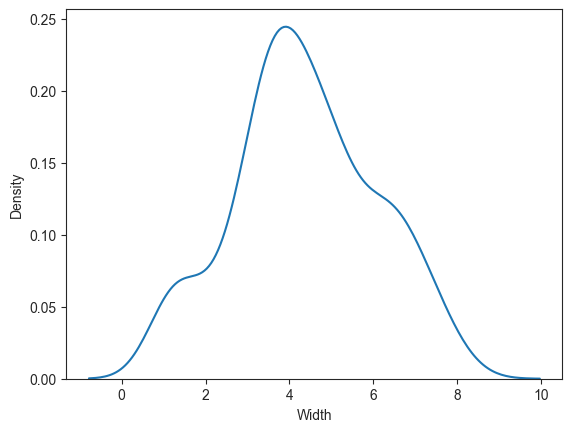

In [115]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(x=df[i])
        plt.show();

### Strip Plot

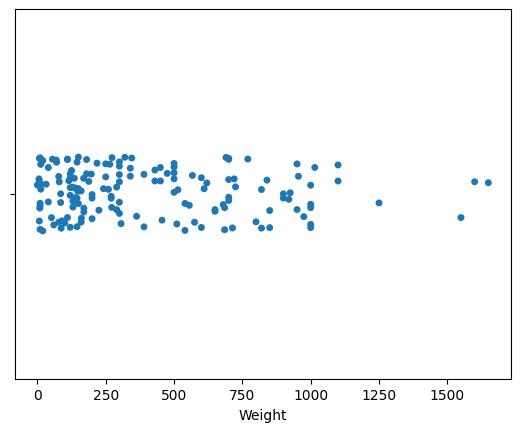

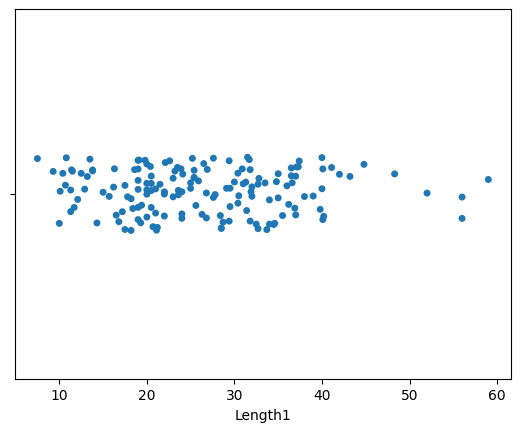

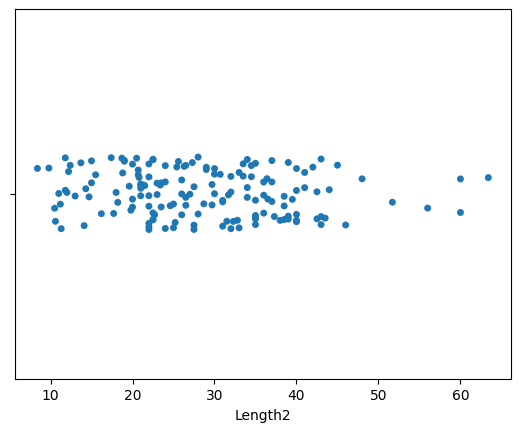

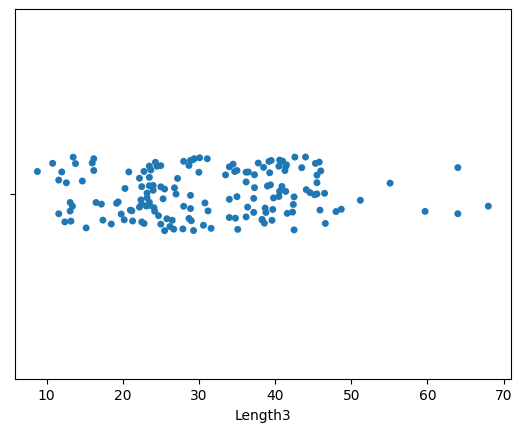

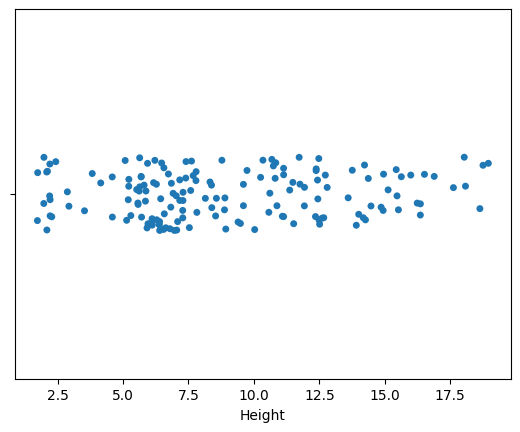

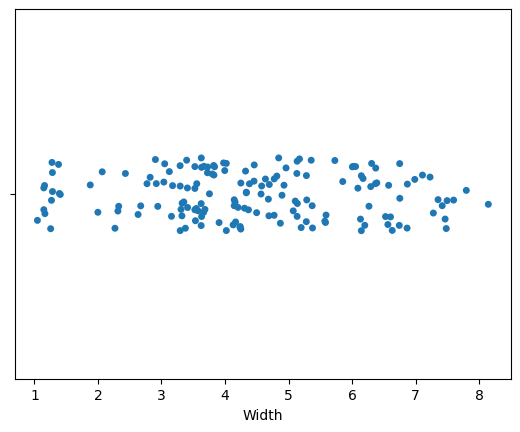

In [11]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.stripplot(x=df[i])
        plt.show();

### Box Plot

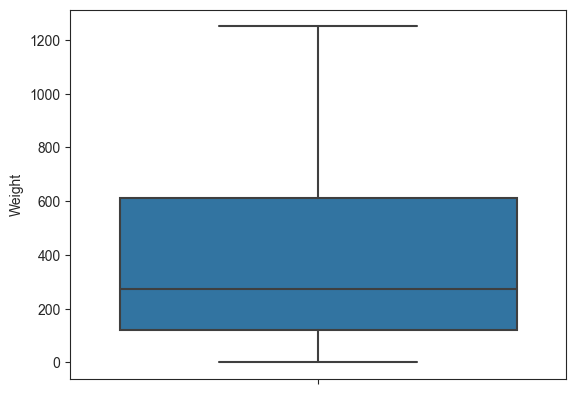

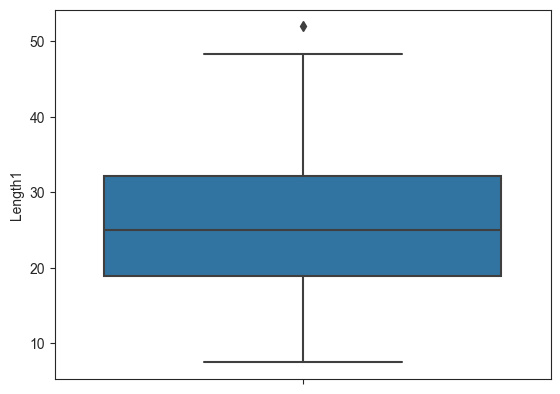

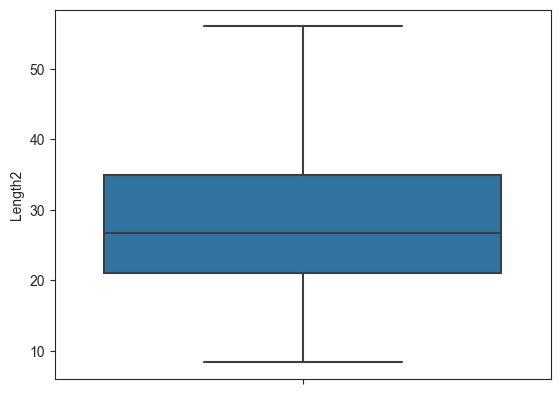

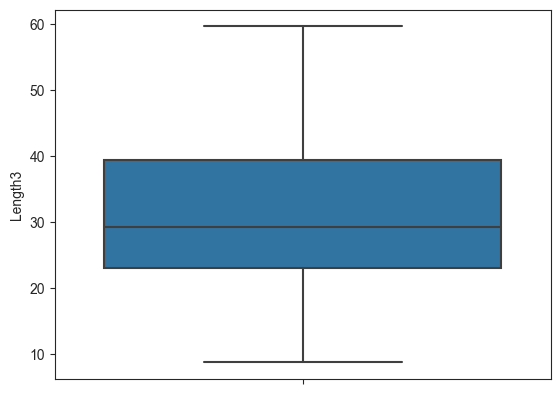

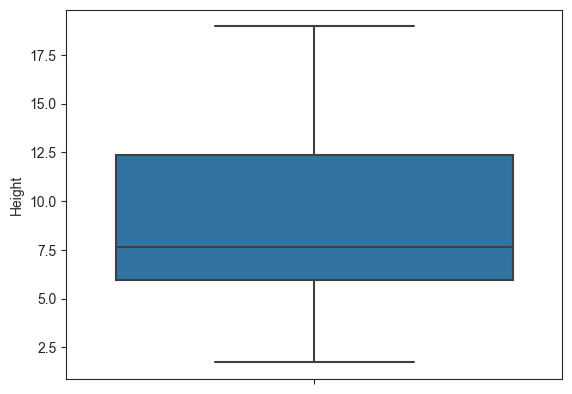

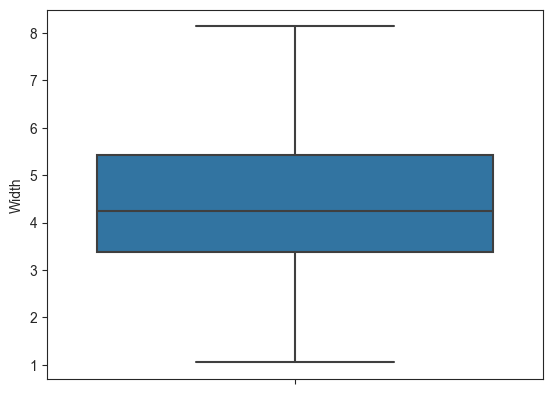

In [114]:
for i in df.columns:
     if df[i].dtypes !='object':
            sns.boxplot(y=df[i])
            plt.show()

### Violin Plot

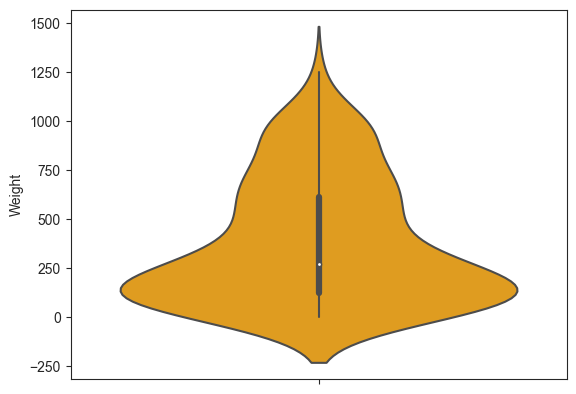

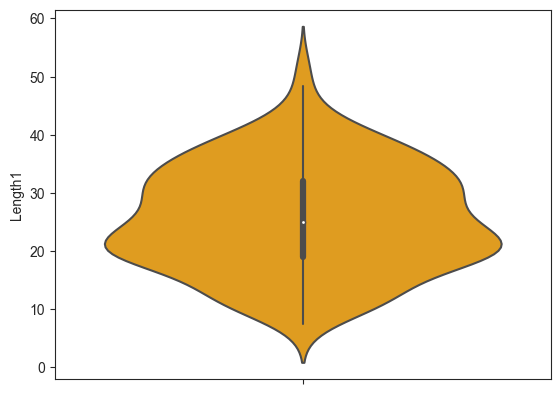

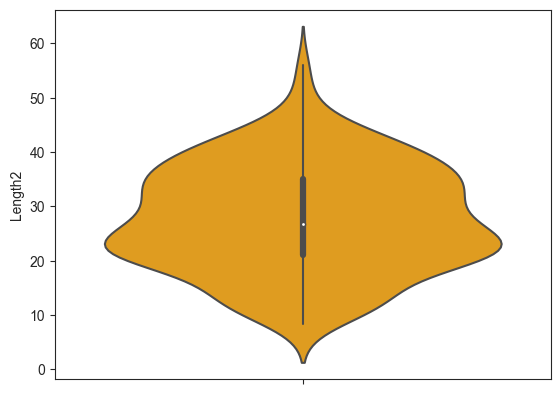

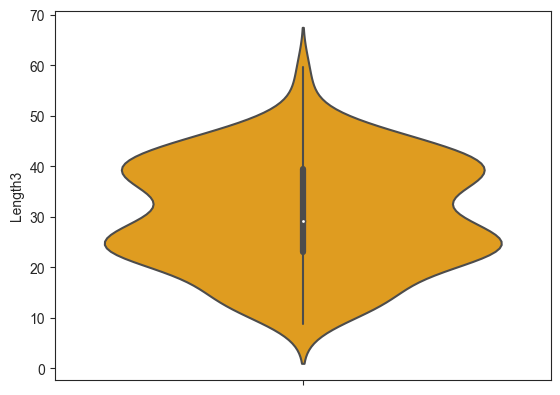

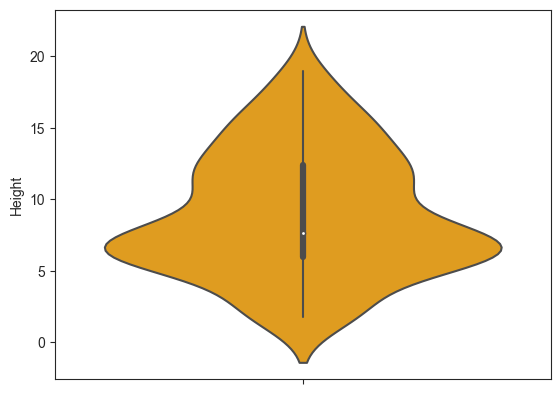

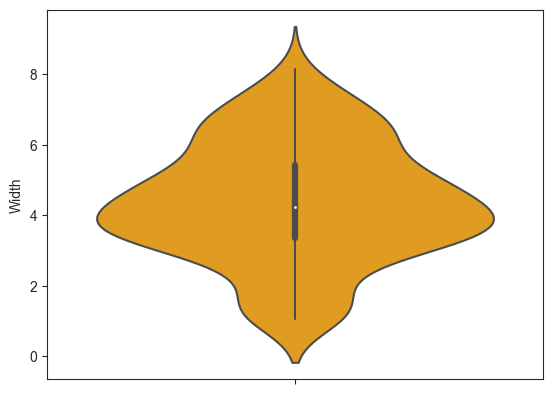

In [107]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.violinplot(y=df[i],color='orange')
        plt.show();

In [13]:
df.describe() # describes abouts dataset 

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [113]:
Species=df.Species.value_counts()

### Pie Chart

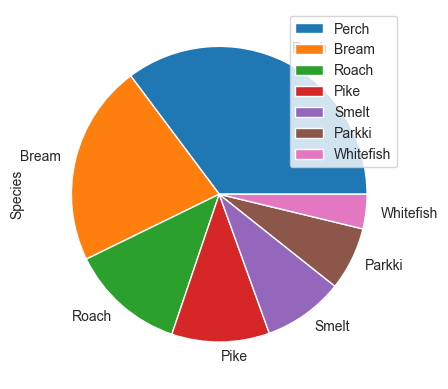

In [15]:
sns.set_style('ticks')
Species.plot.pie()
plt.legend()
plt.show();

### Count Plot

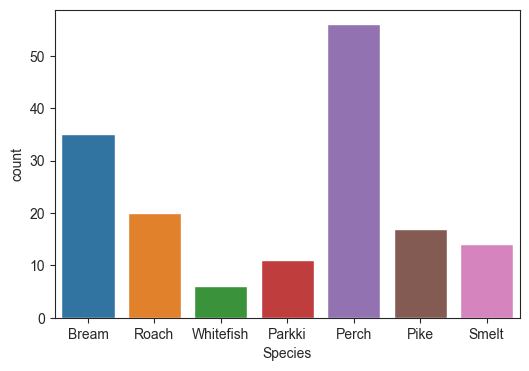

In [16]:
plt.figure(figsize=(6,4))
sns.countplot('Species',data=df)
plt.show()

### insights of Univariate analysis
#### > most of the weight data are laying between 0 to 250
#### >min weight 0 ,max weight 1250 , mean of weight 375, std 319

#### >



### Bivariate Analysis

### Pair Plot

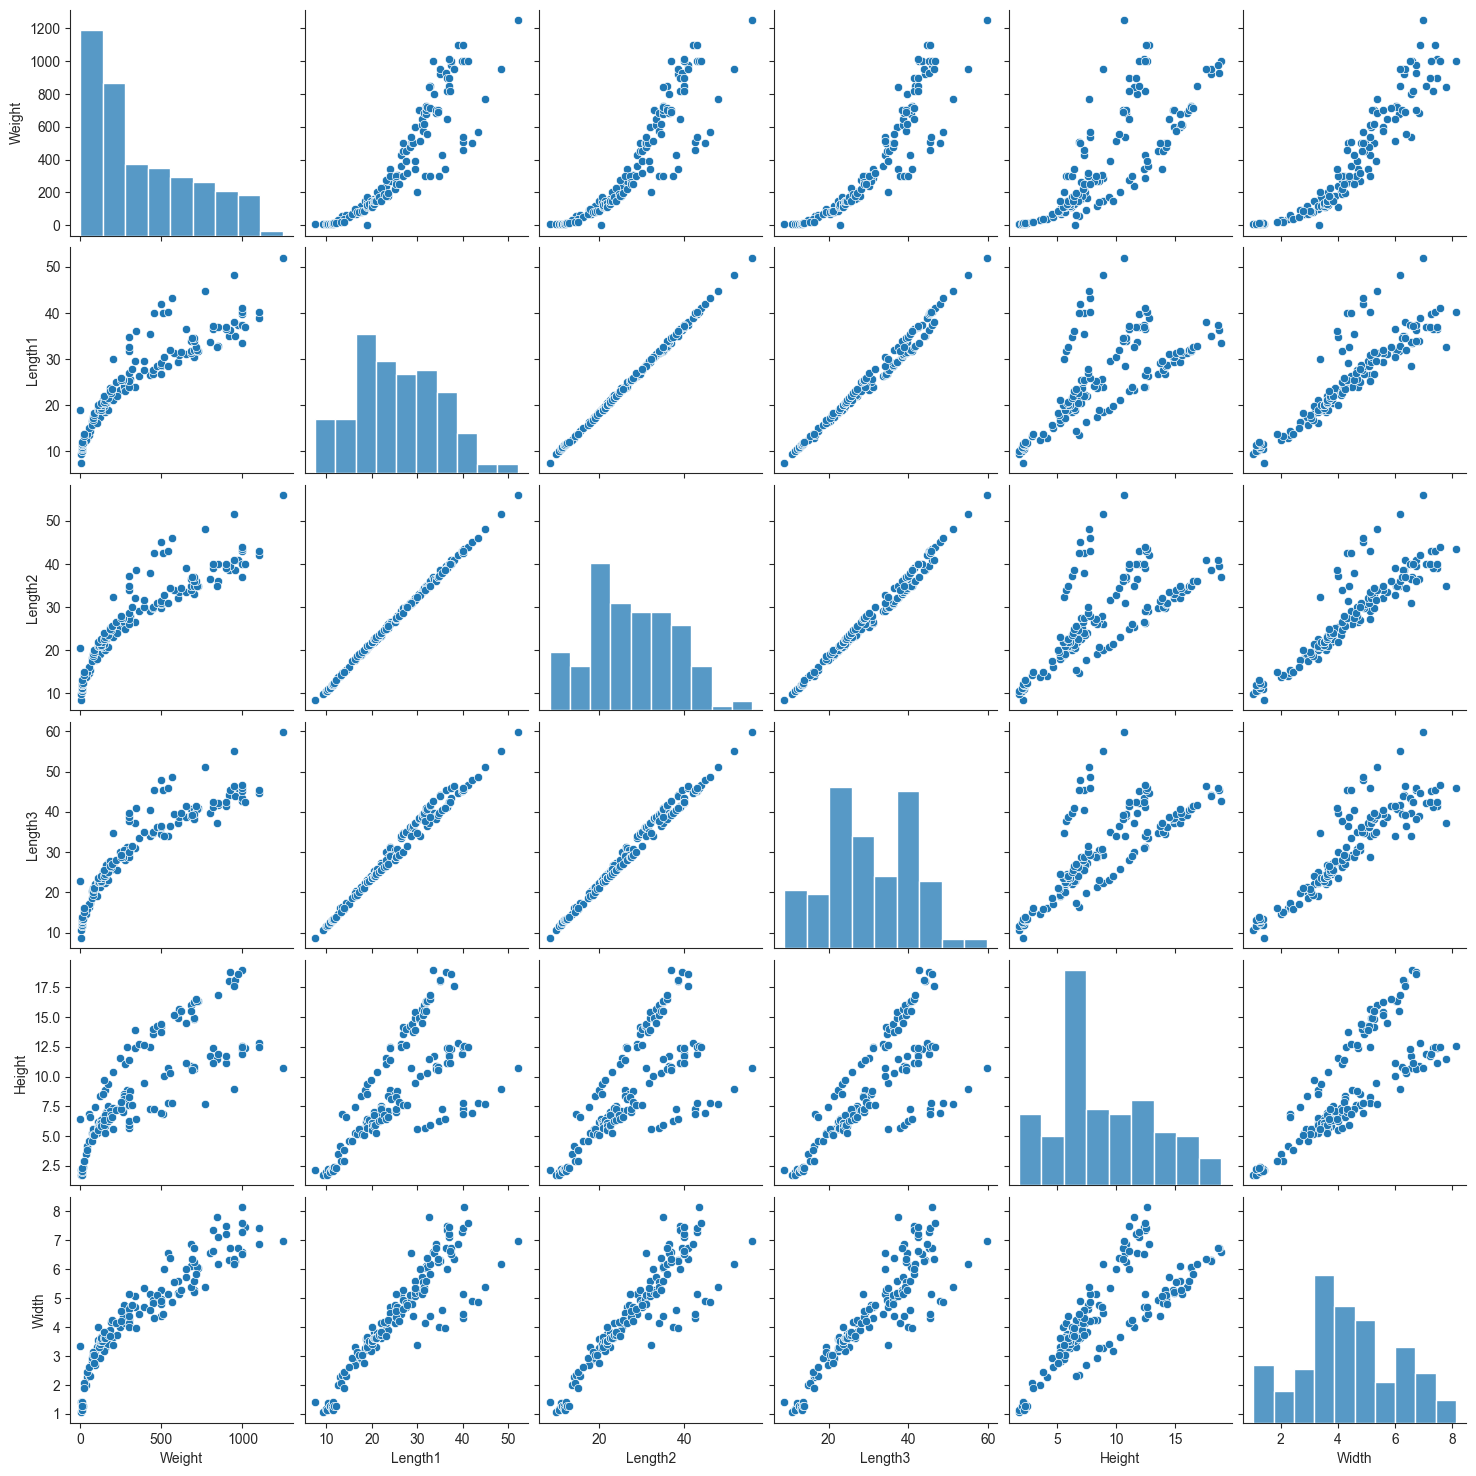

In [112]:
sns.pairplot(data=df)
plt.show()

### Line Plot

<AxesSubplot: xlabel='Weight', ylabel='Height'>

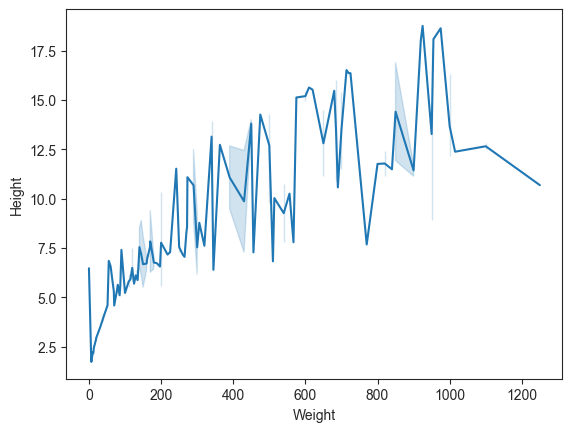

In [110]:
sns.lineplot(x='Weight', y='Height', data=df)

<AxesSubplot: xlabel='Weight', ylabel='Width'>

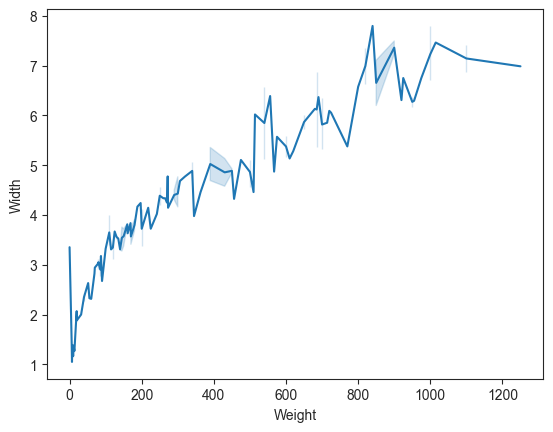

In [111]:
sns.lineplot(x='Weight', y='Width', data=df)

### Heat Map

<AxesSubplot: >

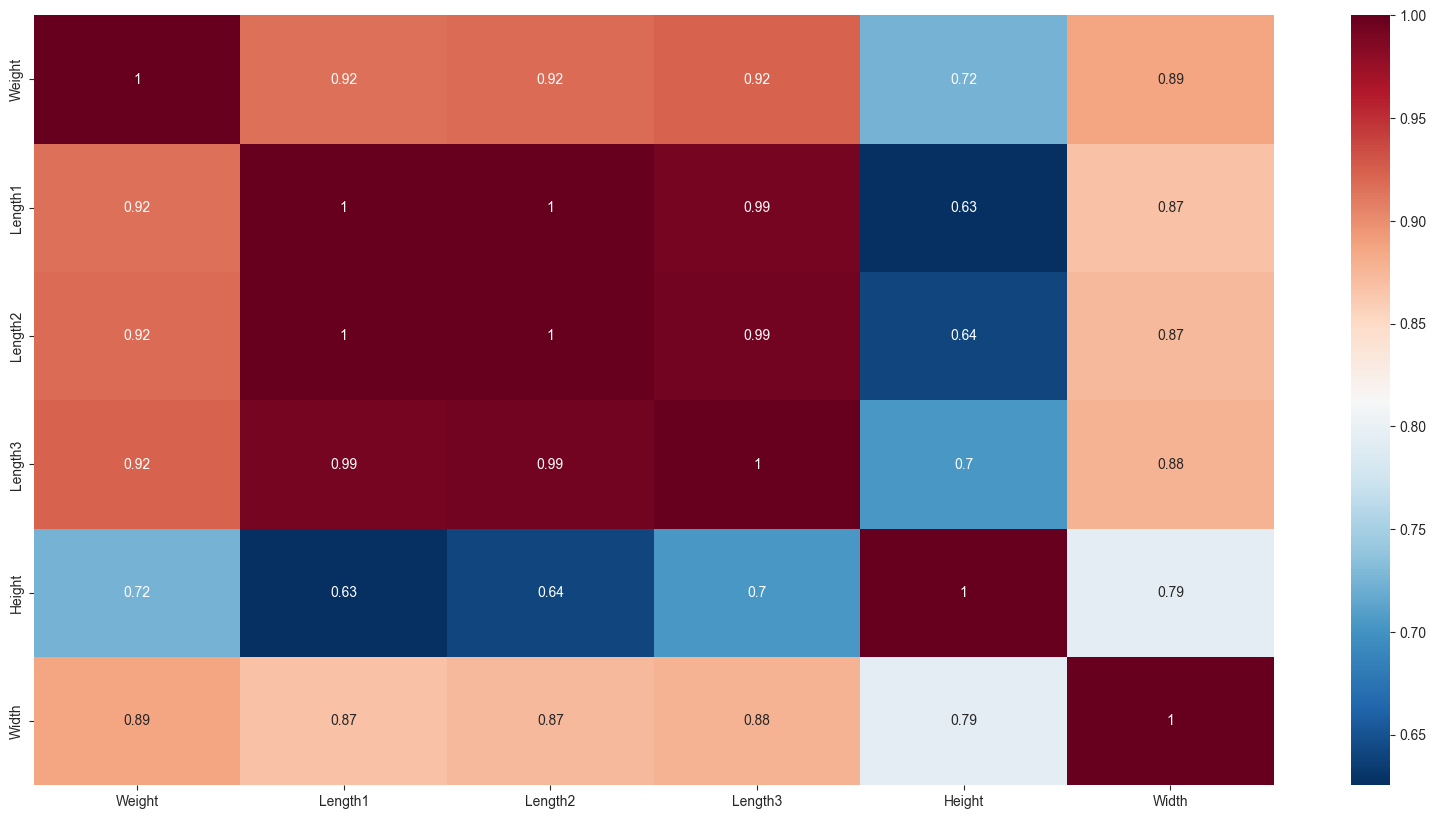

In [19]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='RdBu_r')

### Outlier Treatment

In [20]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL


In [21]:
for column in df.columns:
    if df[column].dtype !="object":
        UL,LL=outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

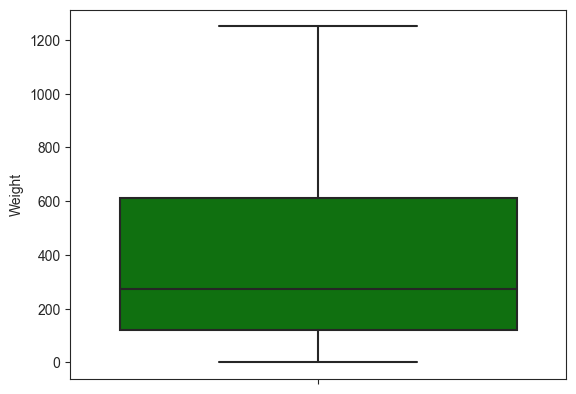

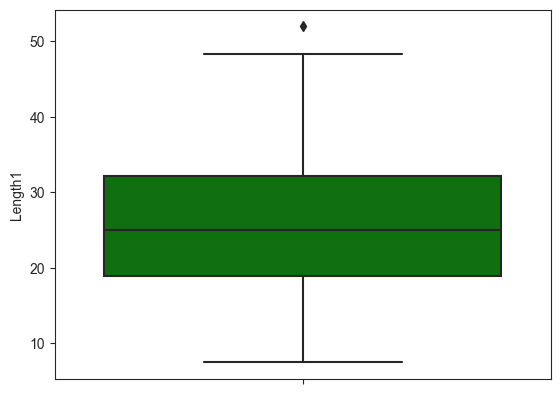

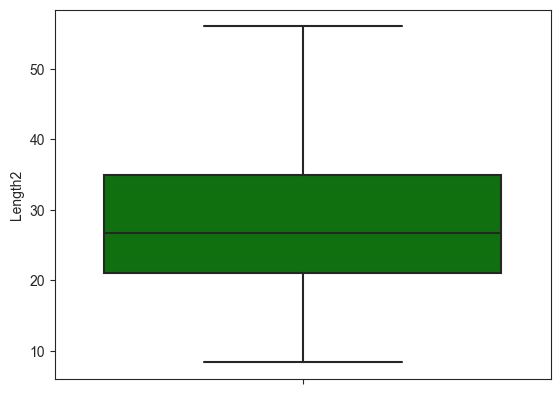

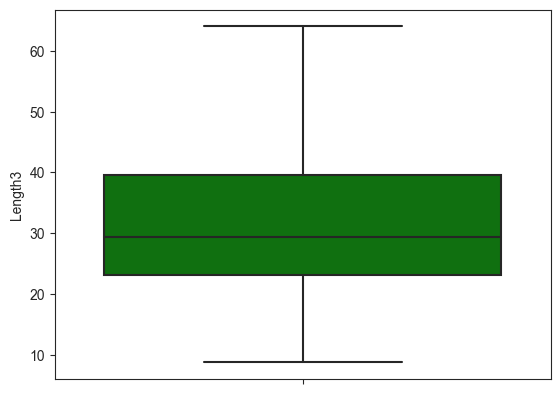

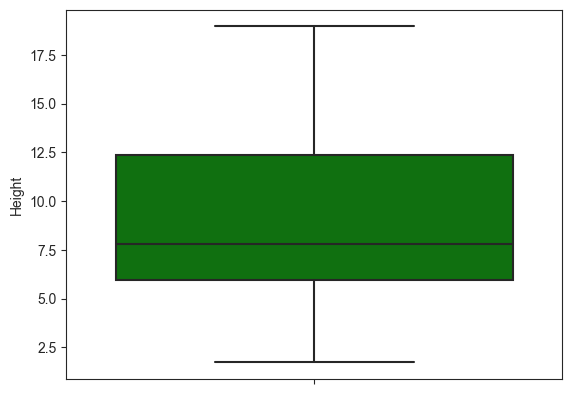

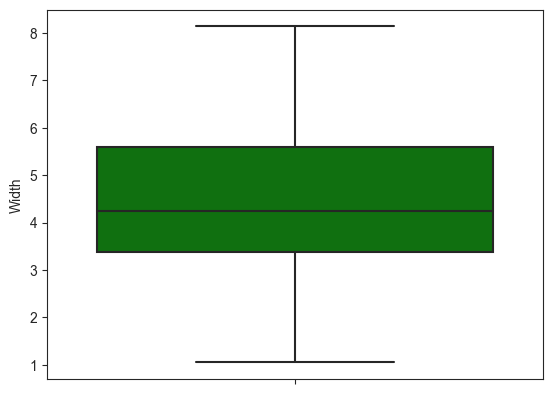

In [22]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color='green')
        plt.show();

In [23]:
df.dropna(inplace=True) # droping null values

In [24]:
df.isnull().sum() # checking null values

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

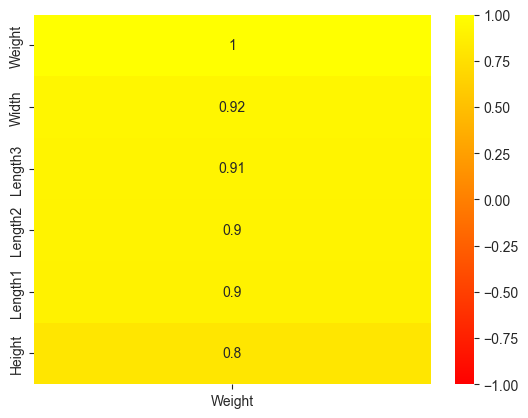

In [25]:
sns.heatmap(df.corr()[["Weight"]].sort_values(by="Weight", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn");

In [26]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

   ### For  Weight

In [27]:
x=df[['Length1', 'Length2', 'Length3', 'Height',
       'Width']].values  # depdent variables 

In [28]:
y=df[['Weight']].values # target variable

In [29]:
sc=StandardScaler()

In [30]:
x=sc.fit_transform(x)  # fiting x using with standardscaler

### Model Selection

In [31]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

### Checking RMSE

In [32]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  140.26006476442492
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  139.60919706929297
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  313.81511767885183
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  112.27636224781956
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  74.5524041766794
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  108.19747927408932
************************************************

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # training and testing part

In [34]:
model=RandomForestRegressor() # model selection

In [35]:
model.fit(x_train, y_train) 

RandomForestRegressor()

In [36]:
y_pred = model.predict(x)

In [37]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [38]:
OUTPUT.head() # output dataframe head

,ACTUAL,PREDICTION
0,242.0,261.34
1,290.0,301.89
2,340.0,329.89
3,363.0,363.02
4,430.0,437.53


### Scatter Plot

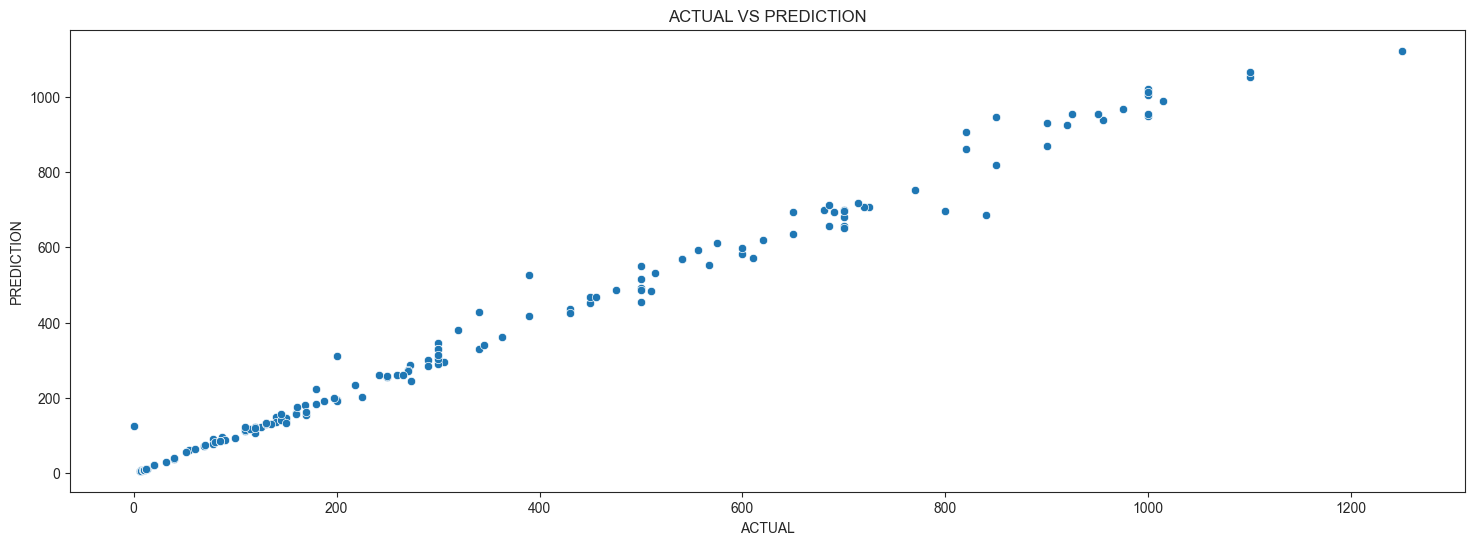

In [39]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

### For Height

In [40]:
x=df[['Length1', 'Length2', 'Length3', 'Weight',
       'Width']].values

In [41]:
y=df[['Height']].values

In [42]:
sc=StandardScaler()

In [43]:
x=sc.fit_transform(x)

In [44]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [45]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1.264569845227054
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  2.0392897979622178
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  2.847380396586272
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  2.999087180087041
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  2.9101987830659657
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  3.09916674577108
***************************************************

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
model=LinearRegression()

In [48]:
model.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(x)

In [50]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [51]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,11.5200,11.617669
1,12.4800,12.577072
2,12.3778,13.222026
3,12.7300,12.393170
4,12.4440,13.974868


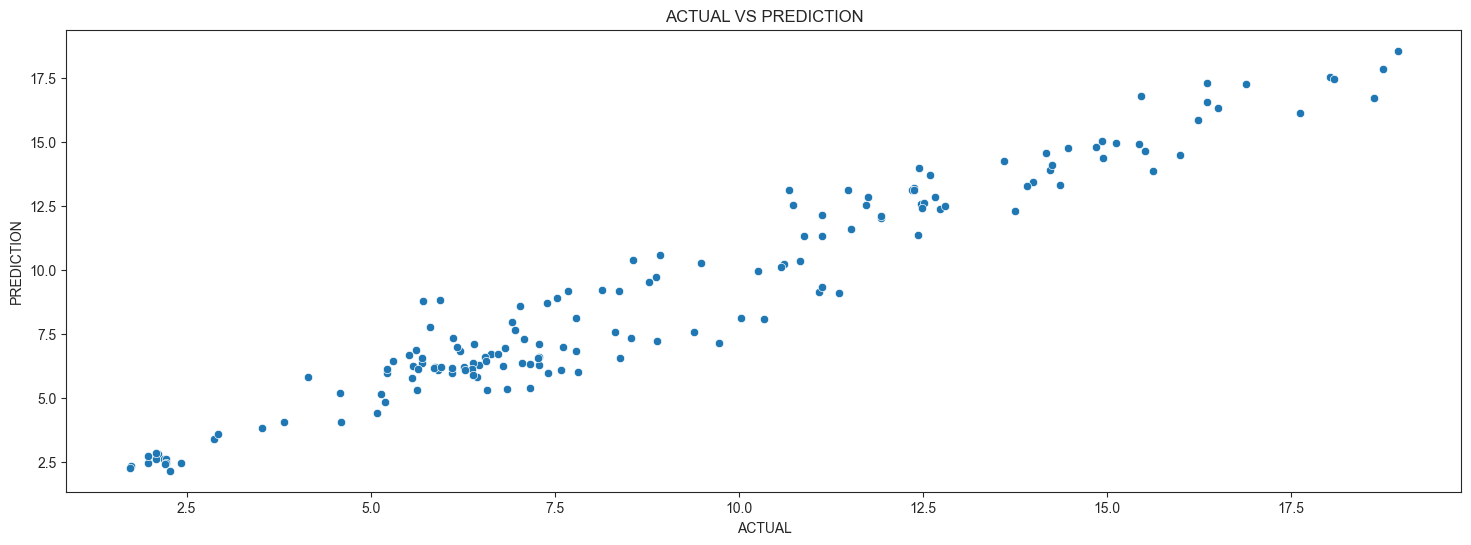

In [52]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

### for Width

In [53]:
x=df[['Length1', 'Length2', 'Length3', 'Weight','Height']].values

In [54]:
y=df[['Width']].values

In [55]:
sc=StandardScaler()

In [56]:
x=sc.fit_transform(x)

In [57]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [58]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.6731926537710453
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.7790336379428653
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.7911835836097701
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  0.6291246078338363
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  0.5677749621534545
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  0.5353267578778392
**********************************************

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [60]:
model=RandomForestRegressor()

In [61]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [62]:
y_pred = model.predict(x)

In [63]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [64]:
OUTPUT

,ACTUAL,PREDICTION
0,4.0200,4.110806
1,4.3056,4.418408
2,4.6961,4.603362
3,4.4555,4.617686
4,5.1340,4.955925
...,...,...
151,1.3936,1.339597
152,1.2690,1.290449
153,1.2558,1.350333
154,2.0672,2.032923


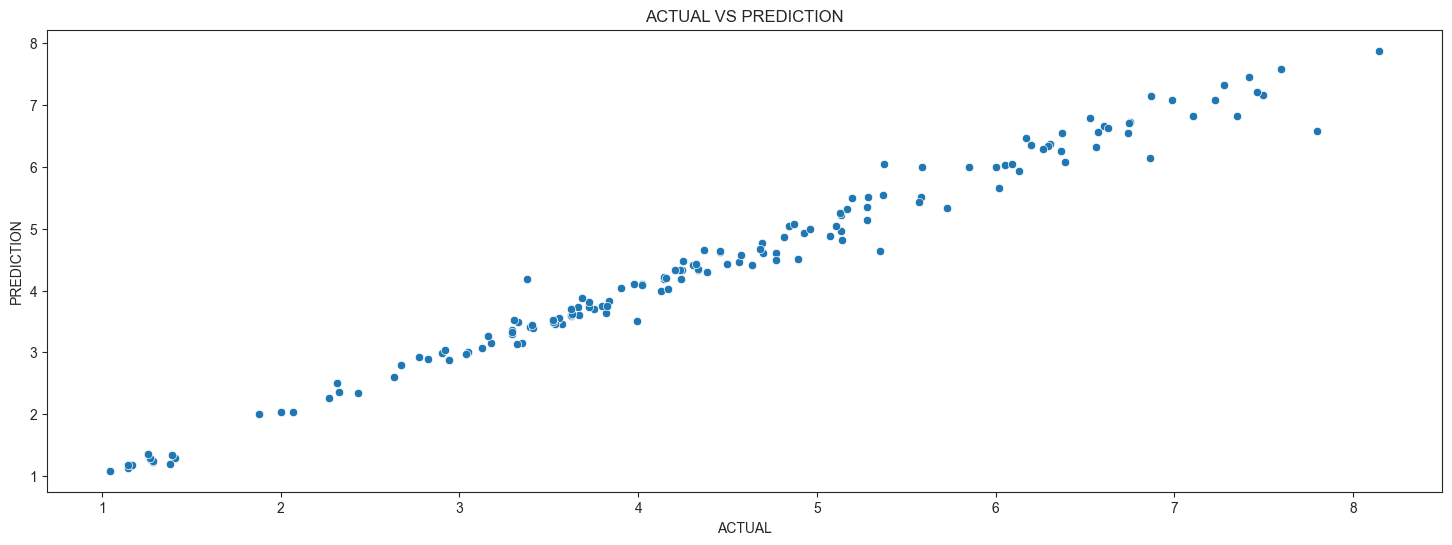

In [65]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

### For Length1

In [66]:
x=df[['Length2', 'Length3', 'Weight','Height','Width']].values

In [67]:
y=df[['Length1']].values

In [68]:
sc=StandardScaler()

In [69]:
x=sc.fit_transform(x)

In [70]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [71]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.29116734817109824
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.4047241875636927
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.4124860012369325
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  1.173390712966798
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  0.9154593571522902
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.267995481688342
***********************************************

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [73]:
model=LinearRegression()

In [74]:
model.fit(x_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(x)

In [76]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [77]:
OUTPUT

,ACTUAL,PREDICTION
0,23.2,23.200852
1,24.0,23.993714
2,23.9,24.180291
3,26.3,26.547582
4,26.5,26.574378
...,...,...
151,11.5,11.381332
152,11.7,11.550285
153,12.1,12.121224
154,13.2,13.256780


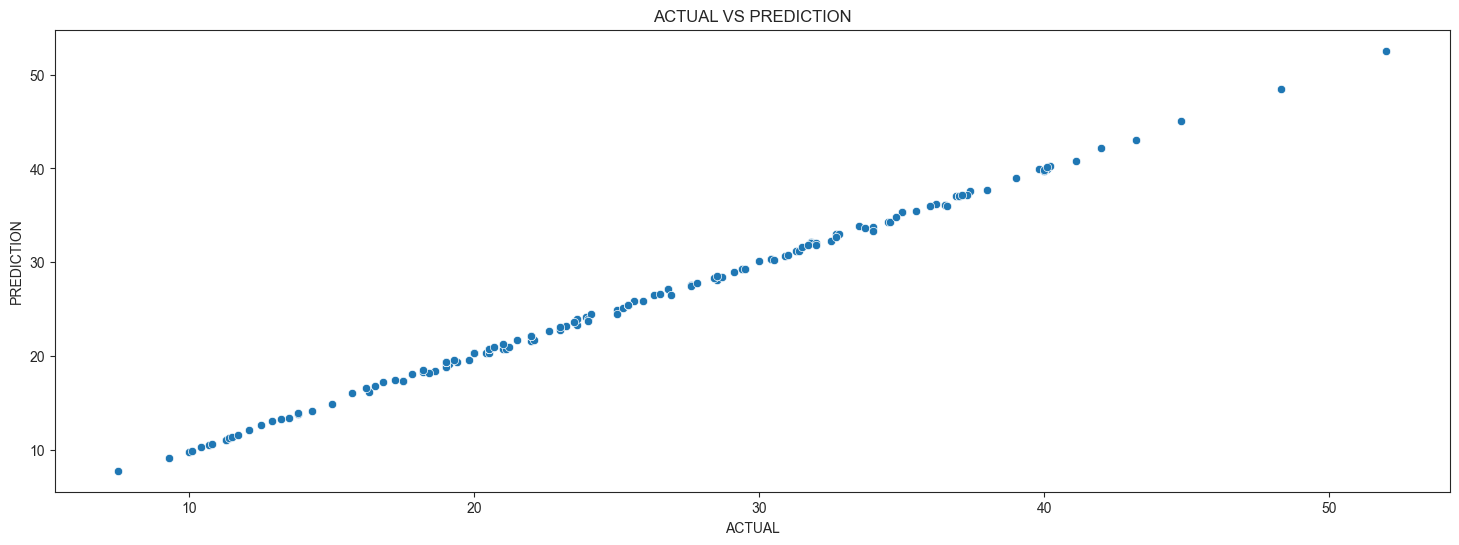

In [78]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

### For Length2

In [79]:
x=df[['Length1', 'Length3', 'Weight','Height','Width']].values

In [80]:
y=df[['Length2']].values

In [81]:
sc=StandardScaler()

In [82]:
x=sc.fit_transform(x)

In [83]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [84]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.2909458289573199
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.4207698956978418
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.46728588962923984
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  1.0937645126420326
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  0.7019295900028923
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.0704461112093824
*********************************************

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [86]:
model=LinearRegression()

In [87]:
model.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred = model.predict(x)

In [89]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [90]:
OUTPUT

,ACTUAL,PREDICTION
0,25.4,25.482492
1,26.3,26.397893
2,26.5,26.361015
3,29.0,28.771395
4,29.0,29.140513
...,...,...
151,12.2,12.380979
152,12.4,12.544010
153,13.0,12.939784
154,14.3,14.265060


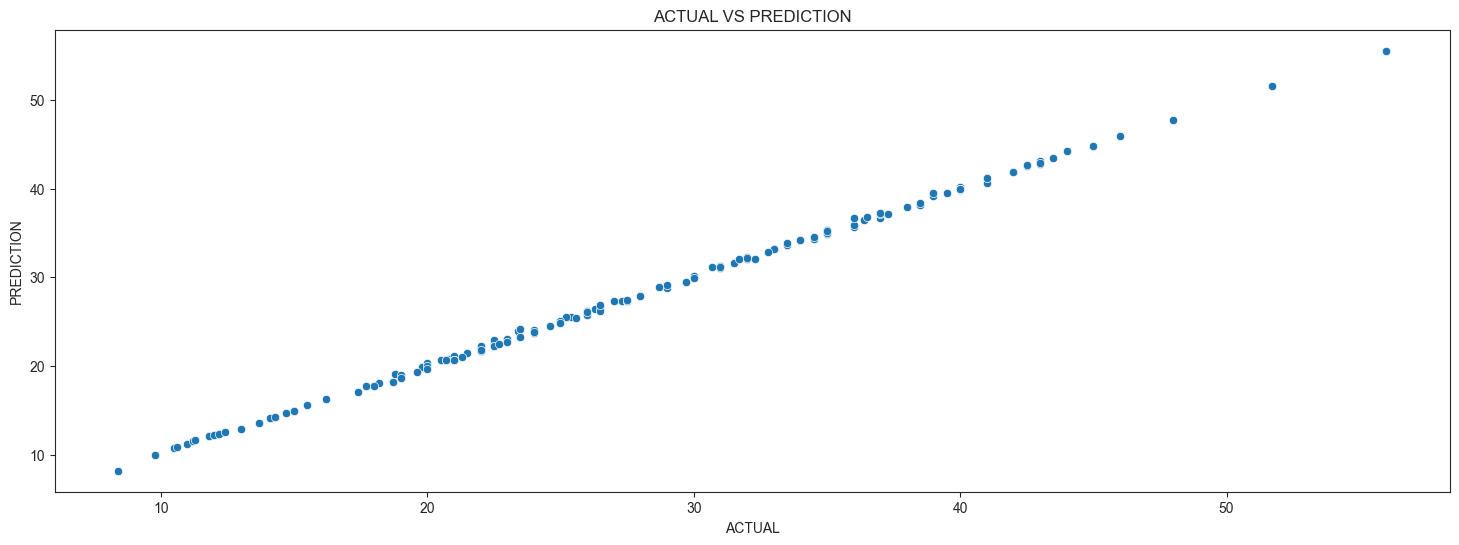

In [91]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

### For Length3

In [92]:
x=df[['Length1', 'Length2', 'Weight','Height','Width']].values

In [93]:
y=df[['Length3']].values

In [94]:
sc=StandardScaler()

In [95]:
x=sc.fit_transform(x)

In [96]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [97]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.706405473577494
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.7936735801925995
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  1.0272887481187731
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  2.5789747204560216
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  1.8053001337489607
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  2.3879329298622993
***********************************************

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [99]:
model=LinearRegression()

In [100]:
model.fit(x_train, y_train)

LinearRegression()

In [101]:
y_pred = model.predict(x)

In [102]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [103]:
OUTPUT

,ACTUAL,PREDICTION
0,30.0,29.483571
1,31.2,30.642993
2,31.1,30.436319
3,33.5,33.451899
4,34.0,32.827479
...,...,...
151,13.4,13.045309
152,13.5,13.503173
153,13.8,14.060062
154,15.2,15.157031


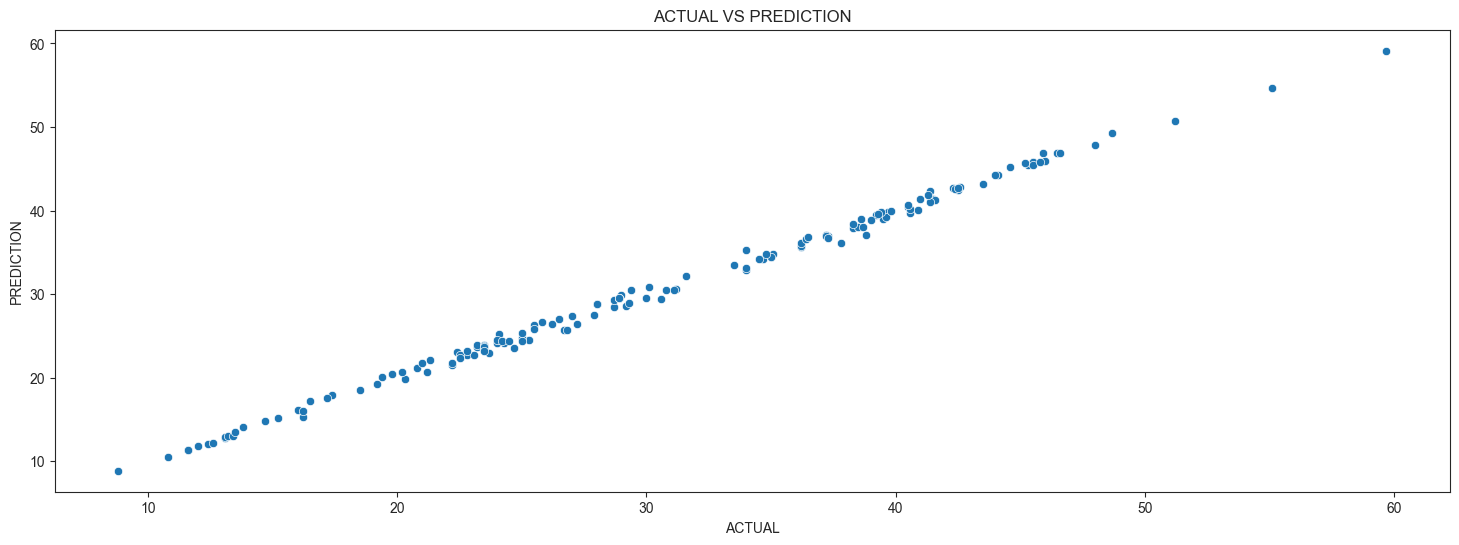

In [104]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");